# < QOPYCAT | Schrödinger Quantum Cats >

![](https://github.com/lucylow/Humans-vs-Quantum-Computers---IBM---QopyCat/blob/main/data/Screen%20Shot%202022-08-23%20at%207.54.19%20PM.png?raw=true)


# Name of Challenge: Humans-vs-Quantum-Computers


"Create a working interactive ‘program’ (it can be a website, game, app, etc.) in which a human user is facing off against a quantum computer. This is broad on purpose - the program can be built in many different ways. Your program should implement strategies that seriously challenge the human player. The implementation must utilize more than just probabilities related to measuring quantum states. You must use Qiskit to program the computer’s gameplay strategy, and as much as possible, the strategy should be implemented with quantum circuits and quantum gates on real quantum hardware (although using the Simulator is understandable given the time limit)."

In [ ]:
import numpy as np
import qiskit.tools.jupyter
%qiskit_version_table

# Importing standard Qiskit libraries
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, IBMQ, Aer
from qiskit import execute
import numpy as np
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator


# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

# Visualisation settings
import seaborn as sns, operator
sns.set_style("dark")

pi = np.pi

# Loading IBM Quantum account(s)
provider = IBMQ.load_account()



In [51]:
# get the least-busy backend at IBM and run the quantum circuit there
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)  # displays job status under cell

Job Status: job has successfully run


# Teleportation Quantum Algorithm

Quantum teleportation allows to transfer the state of a qubit from one location to another over arbitrary long distances. To transfer a quantum bit, Alice and Bob must use a third party (Telamon) to send them an entangled qubit pair. Alice then performs some operations on her qubit, sends the results to Bob over a classical communication channel, and Bob then performs some operations on his end to receive Alice’s qubit.

The Rx gates map the real number from each player by multiplying by π and then we prepare the rotation by x axes on the Bloch sphere by this angle after all this rotations regarding to our promise we are landing in the angle 2K * π for even number (state 0) and K * π for odd number (state 1). An alternative solution has a short version more readable for 3 players using 5 qbits and an extended one with 10 players using 19 qbits, Both solution has a flag called "is_variation" to define if we want to use Renato's solution or ours as seen below showing that the qubit on top has ended up at the bottom.



![](https://github.com/lucylow/Humans-vs-Quantum-Computers---IBM---QopyCat/blob/main/data/Screen%20Shot%202022-08-23%20at%209.06.45%20PM.png?raw=true)



# Gates used:


$
U_1(\lambda)=
\begin{bmatrix}
    1       & 0   \\
    0       & e^{ i \lambda}   \\
\end{bmatrix}
$

$
Rx(\theta)=
\begin{bmatrix}
    \cos (\theta/2)       & -i\sin (\theta/2)   \\
    -i \sin(\theta/2)       & cos (\theta/2)   \\
\end{bmatrix}
$

Alice wants to send quantum information to Bob. Specifically, suppose she wants to send the qubit state  |𝜓⟩=𝛼|0⟩+𝛽|1⟩ . This entails passing on information about  𝛼  and  𝛽  to Bob.

There exists a theorem in quantum mechanics which states that you cannot simply make an exact copy of an unknown quantum state. This is known as the no-cloning theorem. As a result of this we can see that Alice can't simply generate a copy of  |𝜓⟩  and give the copy to Bob. We can only copy classical states (not superpositions).

However, by taking advantage of two classical bits and an entangled qubit pair, Alice can transfer her state  |𝜓⟩  to Bob. We call this teleportation because, at the end, Bob will have  |𝜓⟩  and Alice won't anymore.

# Quantum Teleportation Theory

As you have worked with the Quantum Teleportation's implementation, it is time to understand the mathematics behind the protocol.

#### Step 1

Quantum Teleportation begins with the fact that Alice needs to transmit $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ (a random qubit) to Bob. She doesn't know the state of the qubit. For this, Alice and Bob take the help of a third party (Telamon). Telamon prepares a pair of entangled qubits for Alice and Bob. The entangled qubits could be written in Dirac Notation as:

$$ |e \rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $$

Alice and Bob each possess one qubit of the entangled pair (denoted as A and B respectively),

$$|e\rangle = \frac{1}{\sqrt{2}} (|0\rangle_A |0\rangle_B + |1\rangle_A |1\rangle_B) $$

This creates a three qubit quantum system where Alice has the first two qubits and Bob the last one.

$$ \begin{align*}
|\psi\rangle \otimes |e\rangle &= \frac{1}{\sqrt{2}} (\alpha |0\rangle \otimes (|00\rangle + |11\rangle) + \beta |1\rangle \otimes (|00\rangle + |11\rangle))\\
&= \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|011\rangle + \beta|100\rangle + \beta|111\rangle) 
\end{align*}$$


#### Step 2

Now according to the protocol Alice applies CNOT gate on her two qubits followed by Hadamard gate on the first qubit. This results in the state:

$$ 
\begin{align*} (H \otimes I \otimes I) (CNOT \otimes I) (|\psi\rangle \otimes |e\rangle)
&=(H \otimes I \otimes I) (CNOT \otimes I) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|011\rangle + \beta|100\rangle + \beta|111\rangle) \\
&= (H \otimes I \otimes I) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|011\rangle + \beta|110\rangle + \beta|101\rangle) \\
&= \frac{1}{2}  (\alpha(|000\rangle + |011\rangle + |100\rangle + |111\rangle) + \beta(|010\rangle + |001\rangle - |110\rangle - |101\rangle)) \\
\end{align*}
$$

Which can then be separated and written as: 

$$
\begin{align*}
= \frac{1}{2}(
 & \phantom{+} |00\rangle (\alpha|0\rangle + \beta|1\rangle) \hphantom{\quad )} \\
 & + |01\rangle (\alpha|1\rangle + \beta|0\rangle) \hphantom{\quad )}\\[4pt]
 & + |10\rangle (\alpha|0\rangle - \beta|1\rangle) \hphantom{\quad )}\\[4pt]
 & + |11\rangle (\alpha|1\rangle - \beta|0\rangle) \quad )\\
\end{align*}
$$


#### Step 3

Alice measures the first two qubit (which she owns) and sends them as two classical bits to Bob. The result she obtains is always one of the four standard basis states $|00\rangle, |01\rangle, |10\rangle,$ and $|11\rangle$ with equal probability.  

On the basis of her measurement, Bob's state will be projected to, 
$$ |00\rangle \rightarrow (\alpha|0\rangle + \beta|1\rangle)\\
|01\rangle \rightarrow (\alpha|1\rangle + \beta|0\rangle)\\
|10\rangle \rightarrow (\alpha|0\rangle - \beta|1\rangle)\\
|11\rangle \rightarrow (\alpha|1\rangle - \beta|0\rangle)$$.


#### Step 4

Bob, on receiving the bits from Alice, knows he can obtain the original state $|\psi\rangle$ by applying appropriate transformations on his qubit that was once part of the entangled pair.

The transformations he needs to apply are:

$$
\begin{array}{c c c}
\mbox{Bob's State}                 & \mbox{Bits Received} & \mbox{Gate Applied} \\
(\alpha|0\rangle + \beta|1\rangle) & 00                   & I                   \\
(\alpha|1\rangle + \beta|0\rangle) & 01                   & X                   \\
(\alpha|0\rangle - \beta|1\rangle) & 10                   & Z                   \\
(\alpha|1\rangle - \beta|0\rangle) & 11                   & ZX
\end{array}
$$

After this step Bob will have successfully reconstructed Alice's state.




# Human v.s. Computer Gameplay

 The main concept of this game is how the quantum computer uses the power of quantum superposition, which tells an object can exists in 2 different states at the same time, to win absolutely everytime.
 
 
N players, who can communicate only two classical bits on a chain:  $\alpha_1$ -> $\alpha_2$ -> $\alpha_3$ … -> $\alpha_N$ <br>
Each player $\alpha_i$ receives as input a real number $\alpha_i$.<br>
Promise: $\sum  \alpha_i = K \in  \mathbb{N}$.<br>
Last player $\alpha_N$ should tell the referee whether K is even or odd.<br>
Players are allowed to share a strategy (in particular, to share a large entangled state) before the game starts i.e. before they know the alphas ($\alpha$).

### What are the rules of this game ? <a id="rules"></a>
 1. Quantum Computer plays a move but it is not revealed to the Opponent(Human).
 2. Opponent(Human) plays a move and it is also not revealed to the Quantum Computer.
 3. Finally Quantum Computer plays a move.
 4. Results are shown. If its heads, then Quantum Computer wins. Else, Opponent(Human) wins.

![](https://github.com/lucylow/Humans-vs-Quantum-Computers---IBM---QopyCat/blob/main/data/Screen%20Shot%202022-08-23%20at%207.56.55%20PM.png?raw=true)



Using the above approach the possibility table reduces to-

<table>
<tr>
    <th>Start State</th>
    <th>Quantum</th>
    <th>Classical</th>
    <th>Quantum</th>
    <th>Result</th>
    <th>Who Wins?</th>
</tr>
<tr>
    <td>$|0\rangle$</td>
    <td>$H$</td>
    <td>$I$</td>
    <td>$H$</td>
    <td>$|0\rangle$</td>
    <td>Quantum</td>
</tr>
<tr>
    <td>$|0\rangle$</td>
    <td>$H$</td>
    <td>$X$</td>
    <td>$H$</td>
    <td>$|0\rangle$</td>
    <td>Quantum</td>
</tr>
</table>

Now lets look at the possibilities-


1. Quantum Computer Wins ( $|0\rangle$ ):

$$
\frac{2}{2} = 100 \%
$$

2. Classical Human Wins ( $|1\rangle$ ):

$$
  \frac{0}{2} = 0 \%
$$

3. Either Quantum Computer or Classical Human Wins ( $|0\rangle + |1\rangle$ ):

$$
  \frac{0}{2} = 0 \%
$$



### Quantum gates
Second, we apply a sequence of quantum gates that manipulate the three qubits as required by the teleportation algorithm. In this case, we only need to apply single-qubit Hadamard ($H$) and two-qubit Controlled-X ($\oplus$) gates.  

### Measurements
Third, we measure two of the three qubits. A classical computer interprets the measurements of each qubit as classical outcomes (0 and 1) and stores them in the two classical bits.

### Classically conditioned quantum gates
Fourth, we apply single-qubit $Z$ and $X$ quantum gates on the third qubit. These gates are conditioned on the results of the measurements that are stored in the two classical bits. In this case, we are using the results of the classical computation concurrently in real-time within the same quantum circuit.

In [ ]:
# Basic Human v.s. Quantum Computer example 

# Use H Gate

qc.h(circuit[0])
qc.draw('mpl')

if gate.value == 'i':
    qc.i(circuit[0])
if gate.value == 'x':
    qc.x(circuit[0])

qc.draw('mpl')

qc.measure(circuit, measure)
qc.draw('mpl')

In [57]:
# Choose local backends qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Protocol uses 3 qubits and 2 classical bits in 2 different registers

qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)

# Methods 


The pair Telamon creates is a special pair called a Bell pair. In quantum circuit language, the way to create a Bell pair between two qubits is to first transfer one of them to the X-basis ($|+\rangle$ and $|-\rangle$) using a Hadamard gate, and then to apply a CNOT gate onto the other qubit controlled by the one in the X-basis. It creates an entangled pair of qubits and gives one to Bob and one to Alice.


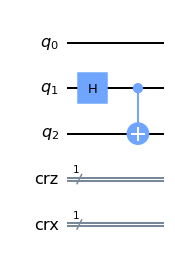

In [15]:
def bell(qc, idx1, idx2):
    """The method create the bell state between two qbits. 
        qc - The Quantum circuit
        idx1 - the index of the first register
        idx2 - the index of the secound register"""
    qc.h(idx1)
    qc.cx(idx1, idx2)
    
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target   
    
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
# In our case, Telamon entangles qubits q1 and q2
# Let's apply this to our circuit:
create_bell_pair(teleportation_circuit, 1, 2)
# And view the circuit so far:
teleportation_circuit.draw()

In [5]:
def encode_number(qc, n, idx, is_variation):
    """The method encode the quantum operation to add the real nuber to current sum.
        qc - The Quantum circuit
        n - the number to add
        idx - the index of the first register
        is_variation - true if we use Rx gate and false for the orginal solution, U1 gate"""
    if (is_variation):
        qc.rx(np.pi * n, idx)
    else:
        qc.u1(np.pi * n, idx)

If Alice owns $q_1$ and Bob owns $q_2$ after they part ways. Alice applies a CNOT gate to $q_1$, controlled by $\vert\psi\rangle$ (the qubit she is trying to send Bob). Then Alice applies a Hadamard gate to $|\psi\rangle$. In our quantum circuit, the qubit ($|\psi\rangle$) Alice is trying to send is $q_0$:

In [17]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

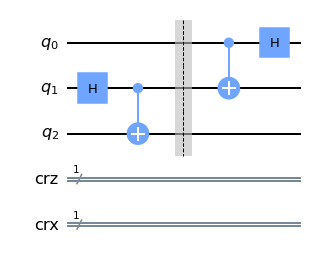

In [19]:

# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)


create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

In [6]:
def do_teleportation(qc, q, idx_q, idx_player1_bell_q, idx_player2_bell_q, cl_reg1, cl_reg2):
    """The method move the quantum state using the quantum teleportation.
        qc - The Quantum circuit
        q - The quantum registers
        idx_q - the index of qbit to teleport
        idx_player1_bell_q - the index of the bell qubit which belong to first player
        idx_player2_bell_q - the index of the bell qubit which belong to first player
        cl_reg1 - the first classical register used to transfer 1 bit
        cl_reg2 - the secound classical register used to transfer 1 bit"""
    # Barrier following state preparation
    qc.barrier()

    # Measure in the Bell basis
    qc.cx(idx_q, idx_player1_bell_q)
    qc.h(idx_q)
    qc.measure(q[idx_q], cl_reg1)
    qc.measure(q[idx_player1_bell_q], cl_reg2)

    # Apply a correction
    qc.barrier()
    qc.z(idx_player2_bell_q).c_if(cl_reg1, 1)
    qc.x(idx_player2_bell_q).c_if(cl_reg2, 1)

Alice applies a measurement to both qubits that she owns,  𝑞1  and  |𝜓⟩ , and stores this result in two classical bits. She then sends these two bits to Bob. Bob, who already has the qubit $q_2$, then applies the following gates depending on the state of the classical bits:

00 $\rightarrow$ Do nothing

01 $\rightarrow$ Apply $X$ gate

10 $\rightarrow$ Apply $Z$ gate

11 $\rightarrow$ Apply $ZX$ gate

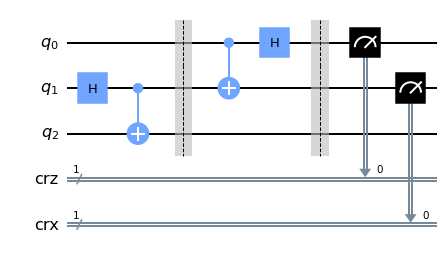

In [23]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)
    
def extract_result(results):
    """This method print the result of the game
         results - list of result from the game execution to be interated
    """    
    res = [False, False]
    for v in results.get_counts():
        res[int(v[0])] = True
    if res[0] and res[1]:
        raise "Invalid output"
    if (res[0]):
        print("The number is even")
    else:
        print("The number is odd")
        
    
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw()

# Alice's qubit has now teleported to Bob.

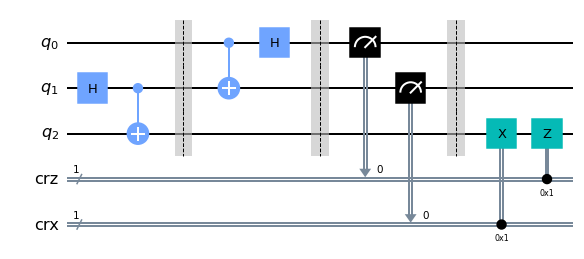

In [29]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'
    
    
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw()

# Game on a Real Quantum Computer 

We will initialize Alice's qubit in a random state $\vert\psi\rangle$ (`psi`). This state will be created using an `Initialize` gate on $|q_0\rangle$. In this chapter we use the function `random_statevector` to choose `psi` for us. Using the Simulated Statevector 
We can use the Aer simulator to verify our qubit has been teleported. Let's create our initialization instruction to create $|\psi\rangle$ from the state $|0\rangle$:

<IPython.core.display.Latex object>

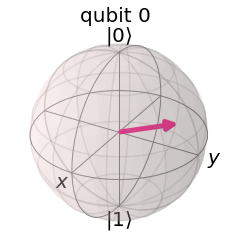

In [30]:
# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

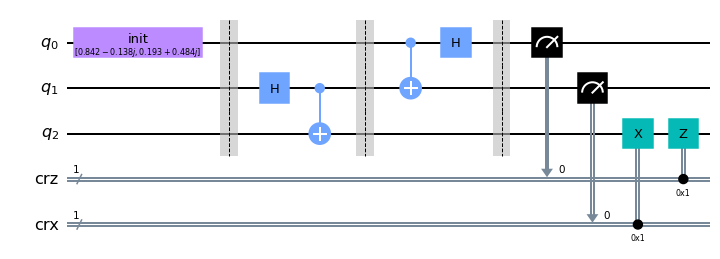

In [32]:
init_gate = Initialize(psi)
init_gate.label = "init"

## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw()

Using the statevector obtained from the aer simulator, that the state of $|q_2\rangle$ is the same as the state $|\psi\rangle$ we created above, while the states of $|q_0\rangle$ and $|q_1\rangle$ have been collapsed to either $|0\rangle$ or $|1\rangle$. The state $|\psi\rangle$ has been teleported from qubit 0 to qubit 2. Quantum teleportation is designed to send qubits between two parties. We do not have the hardware to demonstrate this, but we can demonstrate that the gates perform the correct transformations on a single quantum chip. Here we again use the aer simulator to simulate how we might test our protocol.

On a real quantum computer, we would not be able to sample the statevector, so if we wanted to check our teleportation circuit is working, we need to do things slightly differently. The `Initialize` instruction first performs a reset, setting our qubit to the state $|0\rangle$. It then applies gates to turn our $|0\rangle$ qubit into the state $|\psi\rangle$:

$$ |0\rangle \xrightarrow{\text{Initialize gates}} |\psi\rangle $$

Since all quantum gates are reversible, we can find the inverse of these gates using:

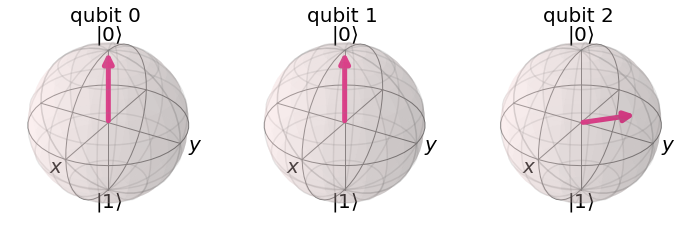

In [34]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

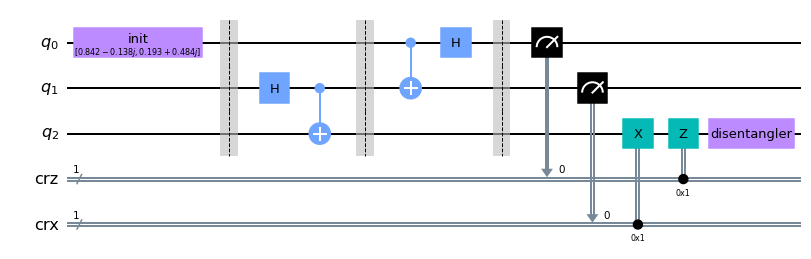

In [36]:
inverse_init_gate = init_gate.gates_to_uncompute()

## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

## STEP 5
# reverse the initialization process
qc.append(inverse_init_gate, [2])

# Display the circuit
qc.draw()

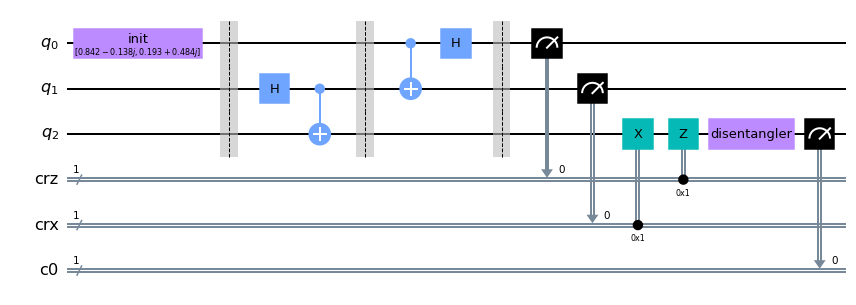

In [37]:
# Need to add a new ClassicalRegister
# to see the result
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw()

In [8]:
def prepare_circuit(numbers, sumK, is_variation):
    """Method prepare the circuit to Renat's game
        numbers - the array of numbers
        sumK - the pramise natural number, the number for the last player will be sumK - numbers
        is_variation - true if we use Rx gate and false for the orginal solution, U1 gate"""
    number_of_player = len(numbers) + 1
    number_of_qbit = 2 * number_of_player - 1
    print("The game with " + str(number_of_player) + " players, qubits: " + str(number_of_qbit))
    
    # calculate the last number
    numbers.append(sumK - sum(numbers))
    
    # create a quantum circuit
    q = QuantumRegister(number_of_qbit)
    cReg = []
    for i in range(number_of_qbit):
        cReg.append(ClassicalRegister(1, "c" + str(i)))
    qc = QuantumCircuit(q, *cReg)
    
    # Prepare the Bell state
    for player in range(number_of_player - 1):
        bell(qc, 2 * player + 1, 2 * player + 2)
    qc.barrier()
    
    # In case of the orginal game, we should put h gate before we start encode the numbers
    if (not is_variation):
        qc.h(0)
    
    for player in range(number_of_player - 1):
        encode_number(qc, numbers[player], player * 2, is_variation)
        do_teleportation(qc, q, player * 2, player * 2 + 1, (player + 1) * 2, cReg[player * 2], cReg[player * 2 + 1])   
   
    # the last player
    encode_number(qc, numbers[number_of_player - 1], (number_of_player - 1) * 2, is_variation)
        
    # In case of the orginal game, we should put h gate before measurment but after encode the whole sum
    if (not is_variation):
        qc.h((number_of_player - 1) * 2)
        
    # measure qubit
    qc.measure(q[(number_of_player - 1) * 2], cReg[(number_of_player - 1) * 2])
    
    return qc

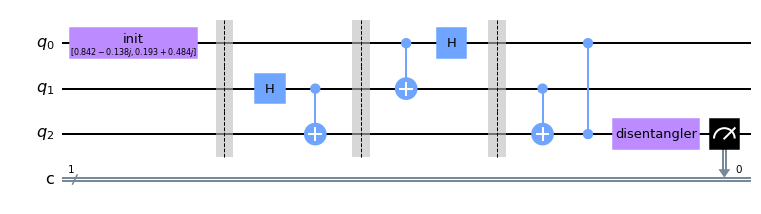

In [50]:
def new_bob_gates(qc, a, b, c):
    qc.cx(b, c)
    qc.cz(a, c)
    
qc = QuantumCircuit(3,1)

# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)
qc.barrier()
# Alice sends classical bits to Bob
new_bob_gates(qc, 0, 1, 2)

# We undo the initialization process
qc.append(inverse_init_gate, [2])

# See the results, we only care about the state of qubit 2
qc.measure(2,0)

# View the results:
qc.draw()

In [45]:
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()

def execute_and_print(qc):
    # compile and run the quantum circuit
    shots = 100
    job = execute(qc, backend, shots=shots)
    results = job.result()
    #print("counts:", results.get_counts())
    extract_result(results)
    return results

<b> Note: </b> To ensure the promise of the game that the sum is a Natural number our input  paramether is not the array of the whole numbers but instead it is the array of numbers N-1 and in the second paramether we will pass the expected sum (which is a natural number ) and finally we calculate the last number by the formula $K - \sum^{n-1} \alpha_i = \alpha_n$<br>

The game with 10 players, qubits: 19
The number is odd


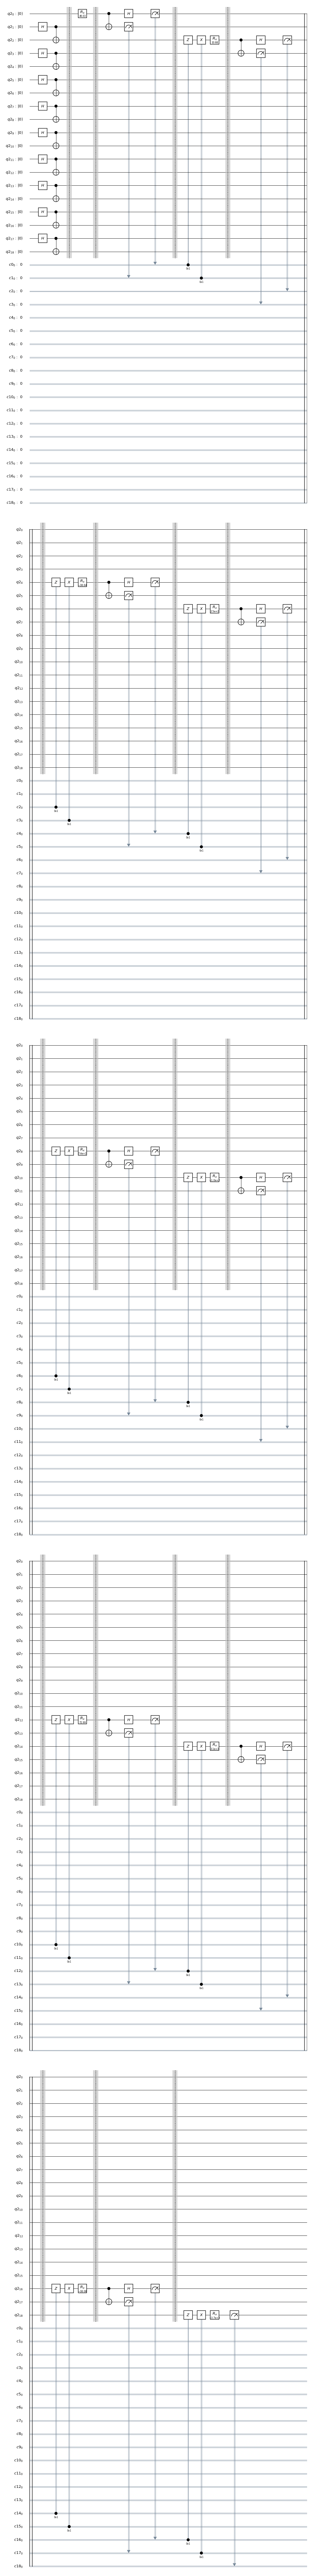

In [13]:

#Options
qc = prepare_circuit([14.6523, 3.4, -12.3, 78.97365, 234.123, -32.1313, 23.2323, 988.1231, -12.1213], 123, True)
#qc = prepare_circuit([14.6523, -12.3], 47, True)
#qc = prepare_circuit([14.6523, -12.3], 48, False)
#qc = prepare_circuit([14.6523, 3.4, -12.3, 78.97365, 234.123, -32.1313, 23.2323, 988.1231], 99, False)

r=execute_and_print(qc)

# plot the circuit
#qc.draw(output='text') #Qiskit lastest version (0.9)
qc.draw(output='mpl') #Qiskit version 0.8

In [ ]:
#Options
# qc = prepare_circuit([14.6523, 3.4, -12.3, 78.97365, 234.123, -32.1313, 23.2323, 988.1231, -12.1213], 123, True)
qc = prepare_circuit([14.6523, -12.3], 47, True)
#qc = prepare_circuit([14.6523, -12.3], 48, False)
#qc = prepare_circuit([14.6523, 3.4, -12.3, 78.97365, 234.123, -32.1313, 23.2323, 988.1231], 99, False)


In [ ]:
#Options
# qc = prepare_circuit([14.6523, 3.4, -12.3, 78.97365, 234.123, -32.1313, 23.2323, 988.1231, -12.1213], 123, True)
# qc = prepare_circuit([14.6523, -12.3], 47, True)
 qc = prepare_circuit([14.6523, -12.3], 48, False)
#qc = prepare_circuit([14.6523, 3.4, -12.3, 78.97365, 234.123, -32.1313, 23.2323, 988.1231], 99, False)


In [ ]:
#Options
# qc = prepare_circuit([14.6523, 3.4, -12.3, 78.97365, 234.123, -32.1313, 23.2323, 988.1231, -12.1213], 123, True)
# qc = prepare_circuit([14.6523, -12.3], 47, True)
# qc = prepare_circuit([14.6523, -12.3], 48, False)
 qc = prepare_circuit([14.6523, 3.4, -12.3, 78.97365, 234.123, -32.1313, 23.2323, 988.1231], 99, False)


In [ ]:
# Plot a histogram
# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)

# Human vs Quantum computer

res = exp_result
backend = Aer.get_backend('aer_simulator')
job = execute(qc, backend, shots=8192)
res = job.result().get_counts()
print(res)
plot_histogram(res)


provider = IBMQ.load_account()
backend_real = provider.get_backend('ibmq_manila')
job_real = execute(qc, backend_real, shots=8192)
res_real = job_real.result().get_counts()
print(res_real)
plot_histogram(res_real)

{'0': 3595, '1': 405}
{'0': 8192}


ibmqfactory.load_account:WARNING:2022-08-24 01:14:05,406: Credentials are already in use. The existing account in the session will be replaced.


# Celebrate the Winner 

The cat is in superposition of |0⟩ and |1⟩ where
A wins with probability A, and B wins with probability B. The real quantum computer only wins ~$99\ \%$ of the time, the $1\ \%$ in which it loses is due to errors. 

In [ ]:
# Print Winner
if len(res) == 1 and list(res.keys())[0] == '0':
    print("Quantum Computer Wins")
if len(res) == 1 and list(res.keys())[0] == '1':
    print("Classical Human Wins")
if len(res) == 2:
    print("Either Quantum Computer or Classical Human Wins")
    
    


# Quantum Teleportation May Lead to Scalable Quantum Computers

Since we live on the NISQ era with Noise Intermediate Scale Quantum Computers, our qubits are noisy and this affects greatly our calculations. if we measure one qubit, we can be
completely sure about the other qubit’s state no matter how far
apart they are placed. Therefore, qubit teleportation is applicable
for communication at any distance, from the chip to planetary
scales. We need to count for that fact by printing the experimental error rate.Quantum error correction is an essential tool for reliably performing tasks for processing quantum information on a large scale.  We have to account for quantum error correction for large-scale
networks for the exchange of qubits over long distances. 

Real world applications include "Ground-to-satellite quantum teleportation" which is essential towards creating a global-scale quantum internet.

In [ ]:
print(f"The experimental error rate : {exp_counts['1']*100/sum(exp_counts.values()):.3f}%")